In [122]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
import pickle
from PIL import Image
from keras.utils import np_utils
import numpy as np
import os
from sklearn.metrics import *

In [5]:
with open('pickle/model.pkl','rb') as f:
    classifier = pickle.load(f)
    test_data_gen = pickle.load(f)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


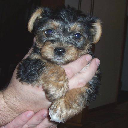

In [7]:
Image.open('dog.4002.jpg').resize((128,128))

In [139]:
path = 'dataset/test_set/'
dog_images = os.listdir(path+'dogs/')
cat_images = os.listdir(path+'cats/')

In [141]:
# im = test_data_gen.flow(np.asarray(dog_images[0]))
dogs = []
for each in dog_images:
    dogs.append(np.asarray(Image.open(path+'dogs/'+each).resize((64,64)), dtype='int32'))

In [108]:
cats = []
for each in cat_images:
    cats.append(np.asarray(Image.open(path+'cats/'+each).resize((64,64)), dtype='int32'))

In [144]:
dogs = np.array(dogs)

In [145]:
dogs.shape

(1000, 64, 64, 3)

In [109]:
cats = np.array(cats)

In [110]:
dogs = test_data_gen.apply_transform(dogs,transform_parameters={'rescale':1.0/255})

In [111]:
cats =  test_data_gen.apply_transform(cats,transform_parameters={'rescale':1.0/255})

In [104]:
y.shape

(1000, 64, 64, 3)

In [118]:
dogs_pred = classifier.predict_classes(dogs)
cats_pred = classifier.predict_classes(cats)

In [119]:
dogs_y = np.ones(len(dogs))
cats_y = np.zeros(len(cats))

In [123]:
confusion_matrix(dogs_y,dogs_pred)
# for predicting dogs our model is fine

array([[  0,   0],
       [183, 817]])

In [124]:
confusion_matrix(cats_y,cats_pred)
# cats perdiction is not so good

array([[589, 411],
       [  0,   0]])

In [125]:
cats_pred[:5]

array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int32)

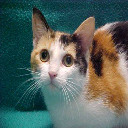

In [134]:
Image.open(path+'cats/'+cat_images[3]).resize((128,128))

In [127]:
path+'cats/'+cat_images[3]

'dataset/test_set/cats/cat.4760.jpg'

In [135]:
dogs_pred[:5]

array([[1],
       [1],
       [0],
       [1],
       [1]], dtype=int32)

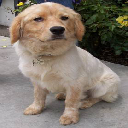

In [138]:
Image.open(path+'dogs/'+dog_images[4]).resize((128,128))

In [ ]:
# using generators when dogs is an array of image
dog_array = test_data_gen.flow(dogs)
classifier.predict_generator(dog_array,steps=len(dogs_pred))

In [167]:
# predict on single image
dogs_0 = test_data_gen.apply_transform(dogs[0],transform_parameters={'rescale':1.0/255})
classifier.predict_classes(np.expand_dims(dogs_0,axis=0))

array([[1]], dtype=int32)

In [ ]:
# The prediction 1 shows its a dog and as we passes a dog image it's predicting it right